In [180]:
!pip install pmdarima

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from fbprophet import Prophet
import pmdarima as pmd

# Stock Prediction using Machine Learning techniques
## Dataset - Nifty50 SBIN

In [22]:
df = pd.read_csv('../input/nifty50-stock-market-data/SBIN.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,2020-10-26,SBIN,EQ,202.80,202.70,204.00,195.60,197.00,196.70,199.33,45471498,9.063790e+14,213023.0,9472379.0,0.2083
5180,2020-10-27,SBIN,EQ,196.70,197.25,197.55,192.25,194.45,194.65,194.96,37802664,7.370107e+14,177545.0,7079292.0,0.1873
5181,2020-10-28,SBIN,EQ,194.65,195.00,195.00,189.05,190.50,190.45,191.54,46462213,8.899259e+14,259437.0,13448807.0,0.2895
5182,2020-10-29,SBIN,EQ,190.45,189.35,190.70,185.90,189.30,188.70,188.17,44823105,8.434162e+14,238791.0,9344991.0,0.2085


In [23]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2.334000e+03,4.670000e+03,4670.000000
mean,981.204880,982.522164,997.663214,965.979958,981.022830,981.197868,982.095966,8.999463e+06,3.835939e+14,1.415825e+05,2.756289e+06,0.281533
std,861.858634,863.014214,874.877331,849.806475,861.608478,861.864930,862.473966,1.611000e+07,3.920775e+14,9.764954e+04,4.729748e+06,0.121526
min,141.450000,142.850000,147.950000,140.050000,140.550000,141.450000,145.900000,3.633000e+03,7.680600e+10,4.016000e+03,1.548000e+04,0.029400
25%,258.437500,258.875000,262.350000,254.850000,258.250000,258.437500,258.242500,1.431046e+06,1.400420e+14,8.360550e+04,3.468592e+05,0.190550
50%,505.675000,504.125000,514.650000,492.025000,504.125000,505.675000,502.370000,2.509438e+06,3.052621e+14,1.131990e+05,6.571515e+05,0.276350
75%,1743.325000,1745.000000,1774.262500,1718.312500,1742.175000,1743.325000,1747.890000,1.055002e+07,4.878573e+14,1.626008e+05,3.906696e+06,0.365000
max,3489.950000,3505.000000,3515.000000,3451.350000,3499.000000,3489.950000,3485.250000,2.626771e+08,8.162141e+15,1.057768e+06,1.333311e+08,0.948200


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5184 non-null   object 
 1   Symbol              5184 non-null   object 
 2   Series              5184 non-null   object 
 3   Prev Close          5184 non-null   float64
 4   Open                5184 non-null   float64
 5   High                5184 non-null   float64
 6   Low                 5184 non-null   float64
 7   Last                5184 non-null   float64
 8   Close               5184 non-null   float64
 9   VWAP                5184 non-null   float64
 10  Volume              5184 non-null   int64  
 11  Turnover            5184 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4670 non-null   float64
 14  %Deliverble         4670 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 607.6

Date is used as the index for the dataframe. As part of cleaning, incomplete and unnecessary columns - series, symbol, trades, deliverable volume and deliverable - are dropped. 

In [25]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.set_index("Date", drop=False, inplace=True)
df.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble"], axis=1, inplace=True)
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,
2000-01-03,2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13
2000-01-04,2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14
2000-01-05,2000-01-05,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13
2000-01-06,2000-01-06,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14
2000-01-07,2000-01-07,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,2020-10-26,202.80,202.70,204.00,195.60,197.00,196.70,199.33,45471498,9.063790e+14
2020-10-27,2020-10-27,196.70,197.25,197.55,192.25,194.45,194.65,194.96,37802664,7.370107e+14
2020-10-28,2020-10-28,194.65,195.00,195.00,189.05,190.50,190.45,191.54,46462213,8.899259e+14


In [26]:
100 * df.isnull().sum() / len(df)

Date          0.0
Prev Close    0.0
Open          0.0
High          0.0
Low           0.0
Last          0.0
Close         0.0
VWAP          0.0
Volume        0.0
Turnover      0.0
dtype: float64

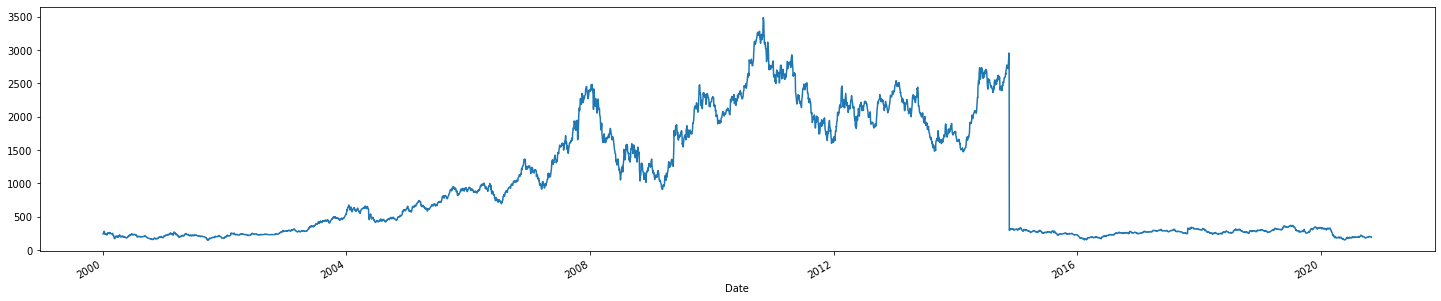

In [27]:
df.VWAP.plot(figsize=(25, 5))
plt.show()

A kernel density estimate plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. Represents the data using a continuous probability density curve in one or more dimensions.

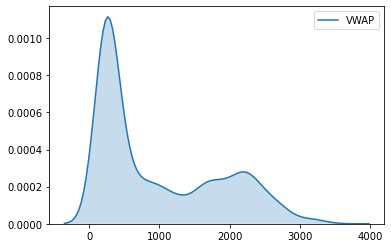

In [28]:
sns.kdeplot(df.VWAP, shade=True)
plt.show()

In [29]:
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.isocalendar().day
df["day_of_week"] = df.Date.dt.dayofweek
df.drop(['Date'], axis=1, inplace=True)
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,,,
2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,1,1,1,0
2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,1,1,2,1
2000-01-05,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,1,1,3,2
2000-01-06,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,1,1,4,3
2000-01-07,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,202.80,202.70,204.00,195.60,197.00,196.70,199.33,45471498,9.063790e+14,10,44,1,0
2020-10-27,196.70,197.25,197.55,192.25,194.45,194.65,194.96,37802664,7.370107e+14,10,44,2,1
2020-10-28,194.65,195.00,195.00,189.05,190.50,190.45,191.54,46462213,8.899259e+14,10,44,3,2


In [30]:
y = df['Close']
df.drop(['VWAP', 'Close'], axis=1, inplace=True)
df

,Prev Close,Open,High,Low,Last,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,
2000-01-03,225.60,236.00,243.65,234.25,243.65,2373228,5.715338e+13,1,1,1,0
2000-01-04,243.65,243.65,262.00,238.85,258.00,4495741,1.130506e+14,1,1,2,1
2000-01-05,259.10,249.00,264.70,245.00,249.05,3434058,8.666008e+13,1,1,3,2
2000-01-06,248.45,252.00,268.00,252.00,260.50,6658801,1.745817e+14,1,1,4,3
2000-01-07,261.00,261.50,279.90,255.00,279.00,7873985,2.118287e+14,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,202.80,202.70,204.00,195.60,197.00,45471498,9.063790e+14,10,44,1,0
2020-10-27,196.70,197.25,197.55,192.25,194.45,37802664,7.370107e+14,10,44,2,1
2020-10-28,194.65,195.00,195.00,189.05,190.50,46462213,8.899259e+14,10,44,3,2


In [33]:
indx = df.index
cols = df.columns
(indx, cols)

(DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
                '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
                '2000-01-13', '2000-01-14',
                ...
                '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
                '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28',
                '2020-10-29', '2020-10-30'],
               dtype='datetime64[ns]', name='Date', length=5184, freq=None),
 Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Volume', 'Turnover',
        'month', 'week', 'day', 'day_of_week'],
       dtype='object'))

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df)
X = pd.DataFrame(data, index=indx, columns=cols)
X

,Prev Close,Open,High,Low,Last,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,
2000-01-03,0.025131,0.027705,0.028423,0.028448,0.030699,0.009021,0.006993,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.030521,0.029981,0.033872,0.029837,0.034971,0.017101,0.013841,0.000000,0.000000,0.166667,0.166667
2000-01-05,0.035135,0.031572,0.034674,0.031695,0.032307,0.013060,0.010608,0.000000,0.000000,0.333333,0.333333
2000-01-06,0.031955,0.032464,0.035654,0.033808,0.035716,0.025336,0.021380,0.000000,0.000000,0.500000,0.500000
2000-01-07,0.035703,0.035290,0.039189,0.034714,0.041224,0.029962,0.025943,0.000000,0.000000,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.018322,0.017801,0.016647,0.016776,0.016808,0.173097,0.111038,0.818182,0.826923,0.000000,0.000000
2020-10-27,0.016500,0.016180,0.014731,0.015764,0.016049,0.143901,0.090288,0.818182,0.826923,0.166667,0.166667
2020-10-28,0.015888,0.015511,0.013974,0.014798,0.014873,0.176868,0.109023,0.818182,0.826923,0.333333,0.333333


RMSE is considered as the evaluation metric

In [94]:
def get_rmse(y_test, y_pred): return np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

# k-Nearest Neighbours algorithm

In [37]:
def get_val(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distances([test_r], [x_train[i]])[0][0]
        distances.append((i, dist))
    distances.sort(key=lambda tup: tup[1])
    v = 0
    for i in range(n_neighbors):
        v += y_test[distances[i][0]]
    return v/n_neighbors

### Train and test without k-Fold

In [64]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]

In [65]:
y_pred = []
for i in X_test.values:
    y_pred.append(get_val(X_train.values, i, y_train, 2))
y_pred

[261.85,
 254.375,
 258.225,
 268.775,
 254.05,
 261.85,
 229.85,
 227.625,
 233.725,
 231.10000000000002,
 229.85,
 227.625,
 228.175,
 234.22500000000002,
 232.45,
 233.575,
 240.25,
 235.975,
 238.325,
 229.85,
 236.05,
 242.35,
 235.975,
 238.5,
 229.85,
 236.05,
 242.275,
 241.95,
 243.9,
 239.22500000000002,
 249.14999999999998,
 249.525,
 242.05,
 249.14999999999998,
 245.625,
 241.95,
 247.025,
 246.125,
 254.125,
 252.875,
 249.325,
 245.925,
 242.95,
 254.125,
 493.32500000000005,
 238.575,
 240.0,
 238.9,
 239.425,
 242.60000000000002,
 238.575,
 240.0,
 274.175,
 282.2,
 311.575,
 273.625,
 274.175,
 241.6,
 277.475,
 276.15,
 273.625,
 274.175,
 246.325,
 277.475,
 244.625,
 273.625,
 236.52499999999998,
 234.2,
 250.625,
 243.075,
 316.95,
 236.52499999999998,
 234.2,
 268.25,
 243.075,
 239.5,
 255.225,
 234.2,
 232.3,
 231.175,
 230.85000000000002,
 231.425,
 234.2,
 229.675,
 228.27499999999998,
 227.72500000000002,
 226.375,
 267.475,
 212.5,
 208.575,
 217.075,
 235.

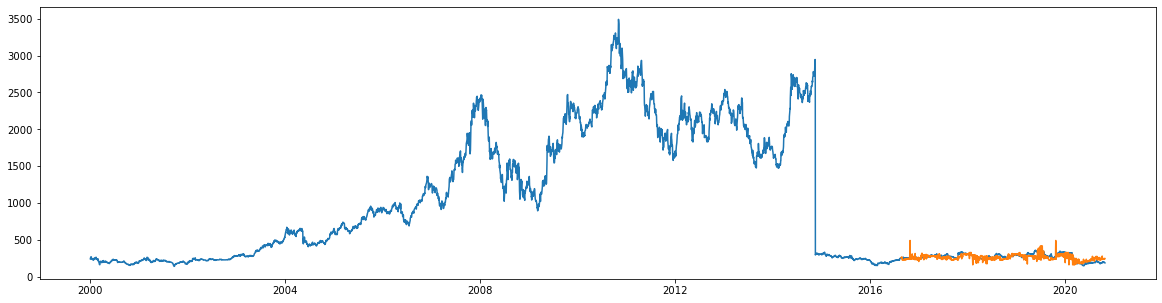

RMS value - 37.20827704348645


In [89]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()
rmse_knn_fl = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print("RMS value -", rmse_knn_fl)

### Train and test with 10 folds (Folds created using TimeSeriesSplit)

In [36]:
ts = TimeSeriesSplit(n_splits=10)

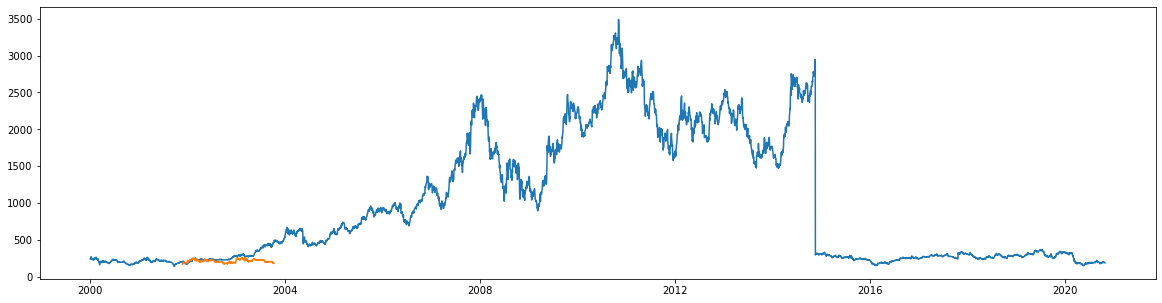

RMSE value - 97.59632697364867


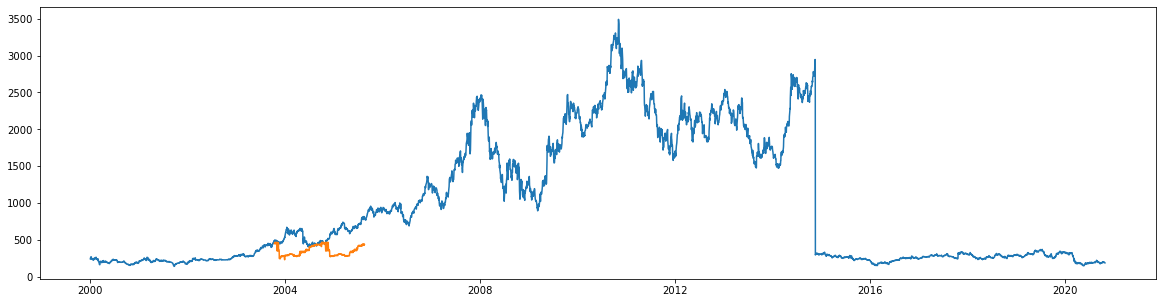

RMSE value - 260.0812745413214


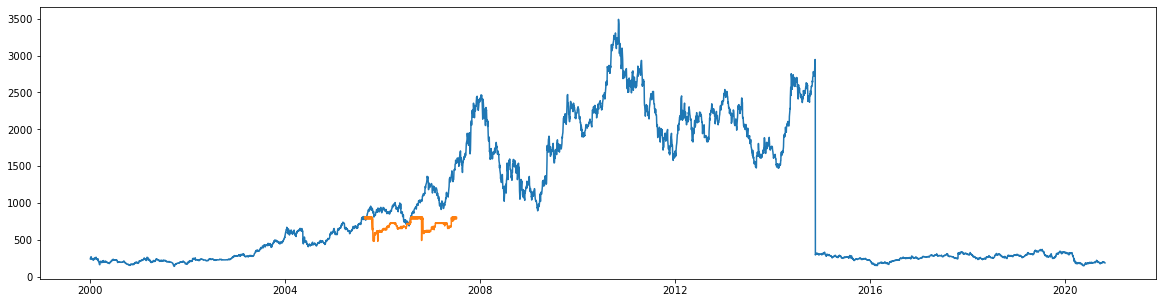

RMSE value - 356.9835440862893


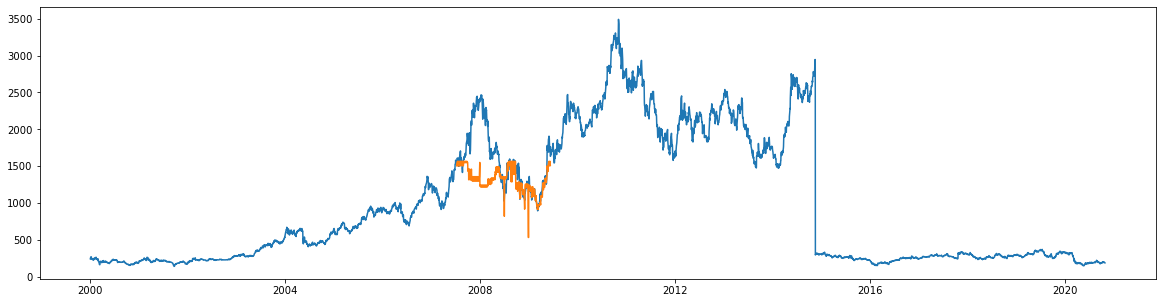

RMSE value - 473.08001088874465


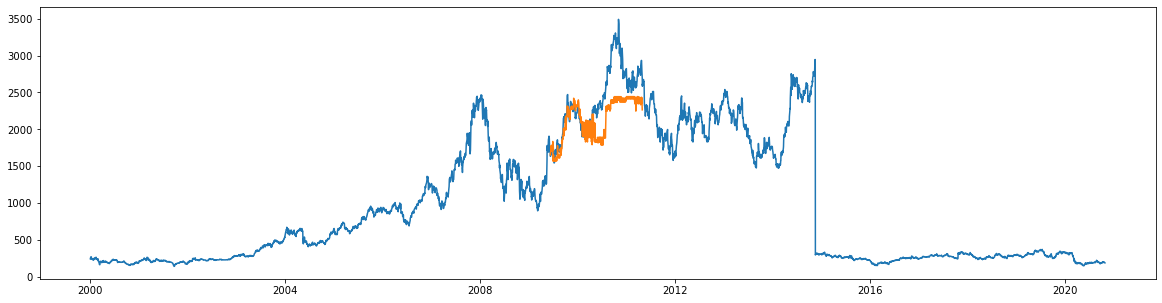

RMSE value - 378.04876758881863


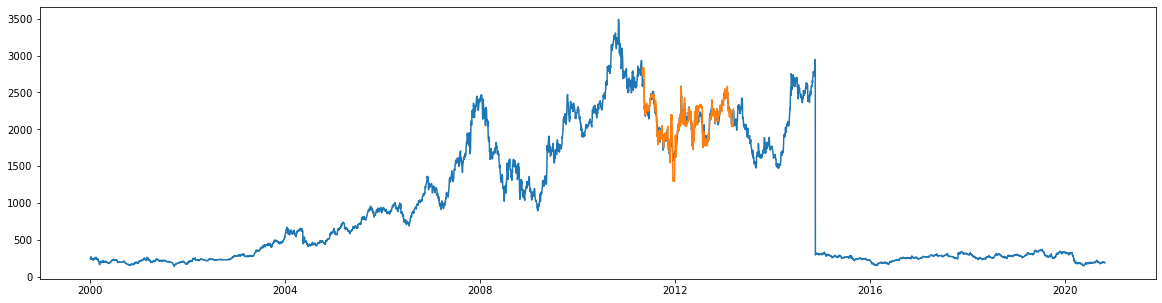

RMSE value - 100.86520430105848


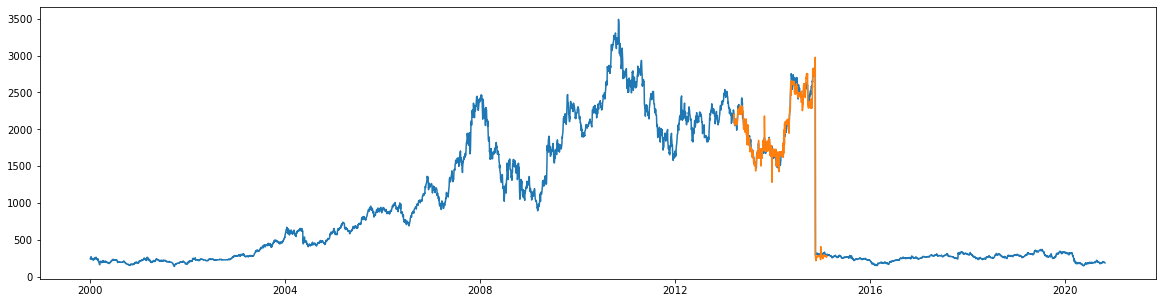

RMSE value - 89.8231179148368


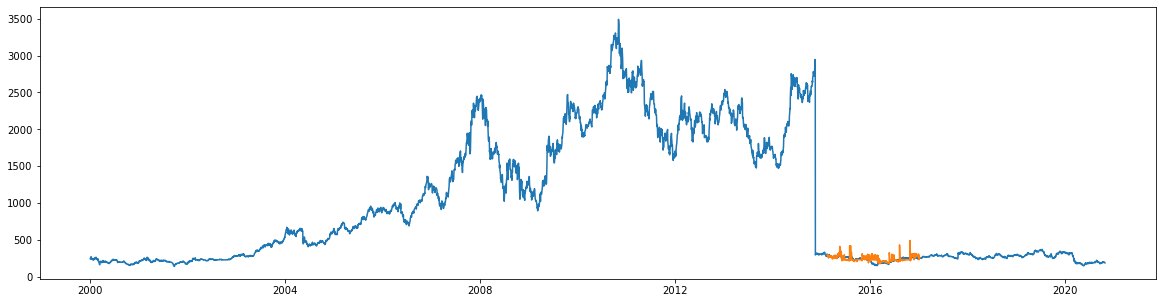

RMSE value - 44.26480090910037


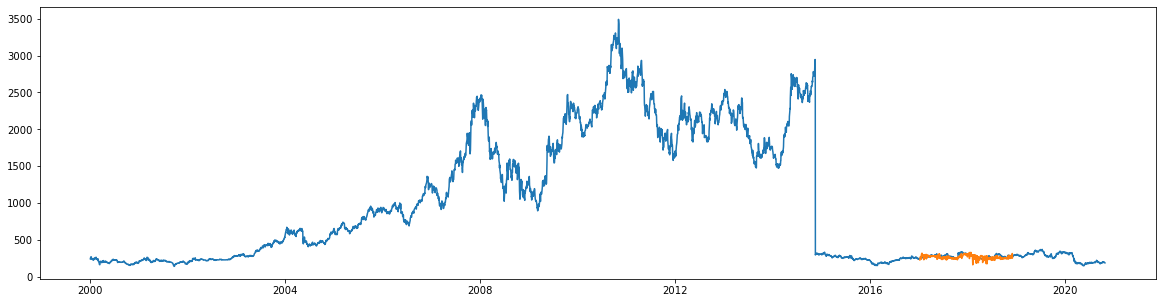

RMSE value - 28.3851317059461


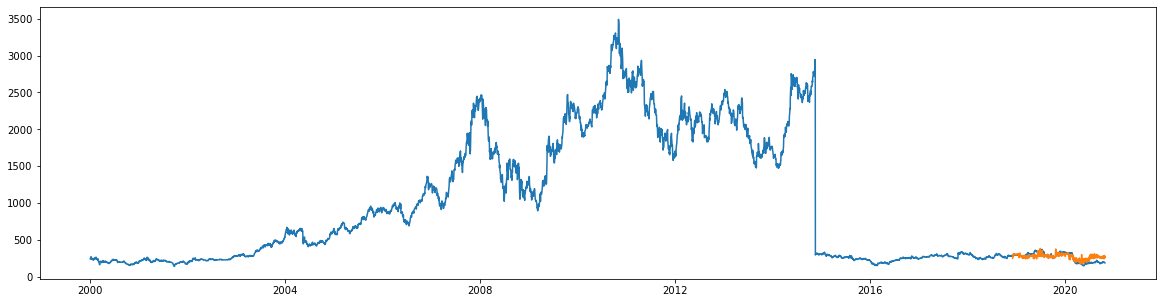

RMSE value - 48.272306277450106


In [43]:
y_preds = []
rmses = []
for train_index,test_index in ts.split(X):
    X_train,X_test = X.values[train_index],X.values[test_index]
    y_train,y_test = y.values[train_index],y.values[test_index]
    y_pred = []
    for row in X_test:
        y_pred.append(get_val(X_train, row, y_train, 2))
    plt.figure(figsize=(20, 5))
    plt.plot(indx, y.values)
    plt.plot(indx[test_index], y_pred)
    plt.show()
    rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
    rmses.append(rmse)
    print("RMSE value -", rmse)

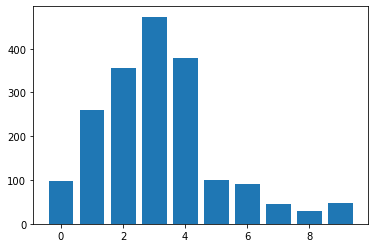

187.74004851872144


In [90]:
plt.bar(range(10), rmses)
plt.show()
rmse_knn_avg = np.mean(rmses)
print(rmse_knn_avg)

In [60]:
fn_ts = TimeSeriesSplit(n_splits=10)

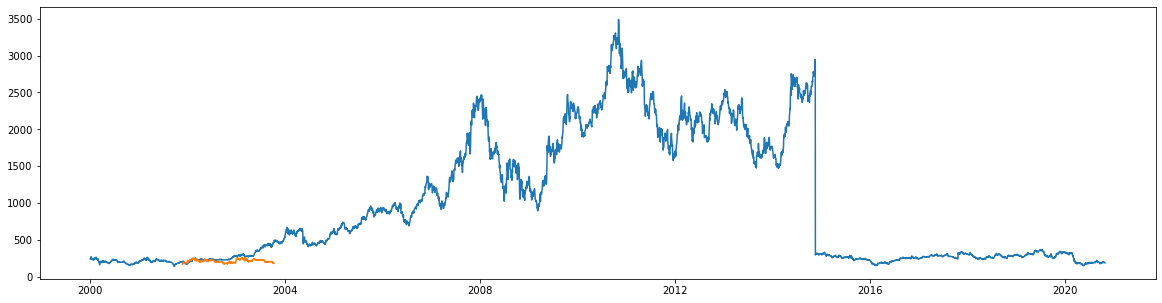

RMSE -  97.59632697364867


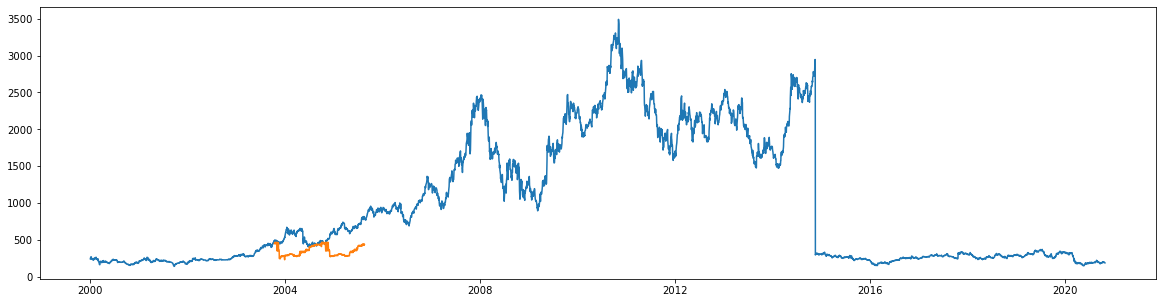

RMSE -  260.0812745413214


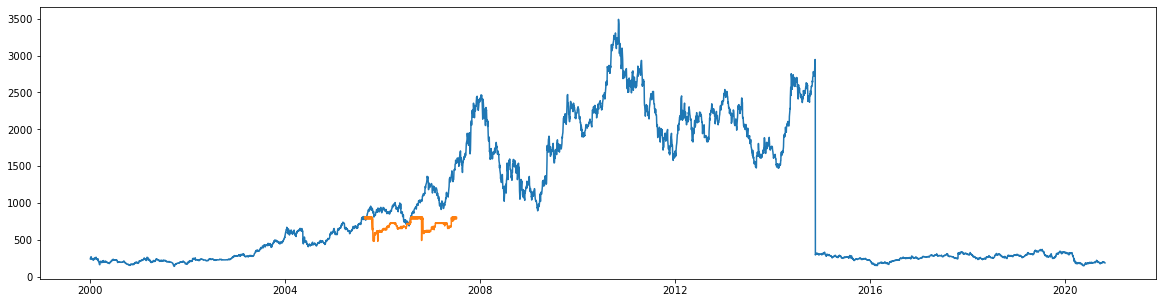

RMSE -  356.9835440862893


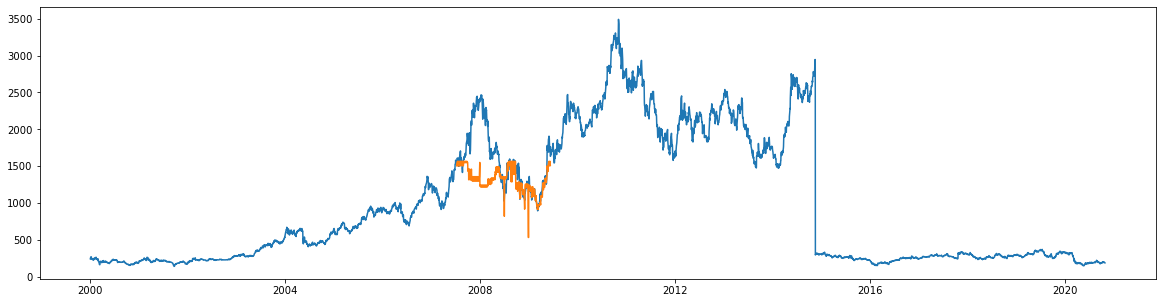

RMSE -  473.08001088874465


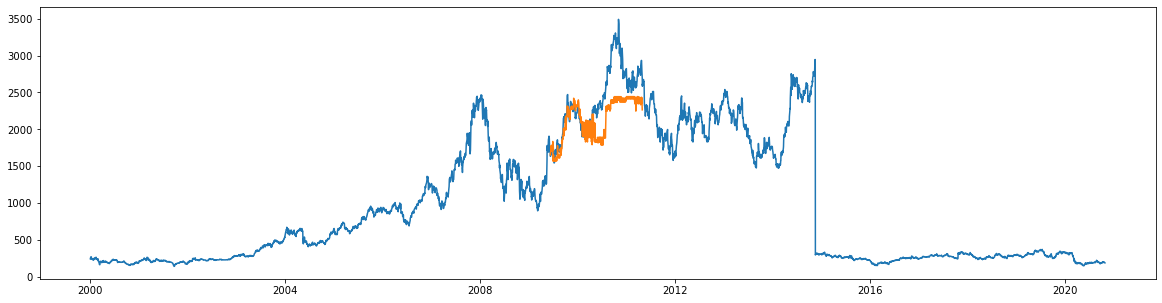

RMSE -  378.04876758881863


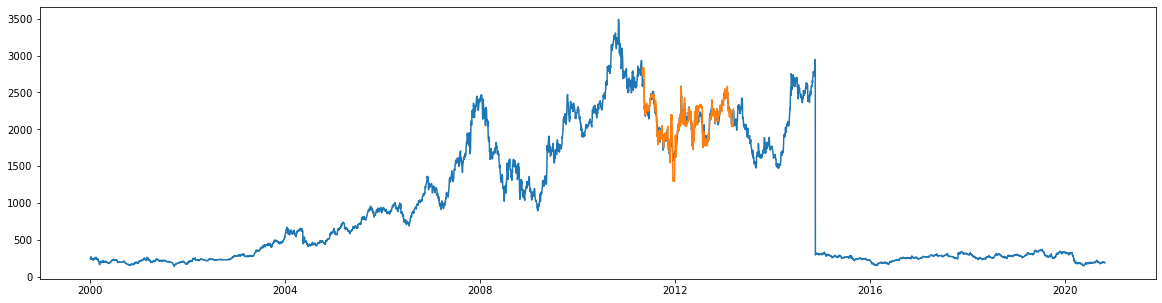

RMSE -  100.86520430105848


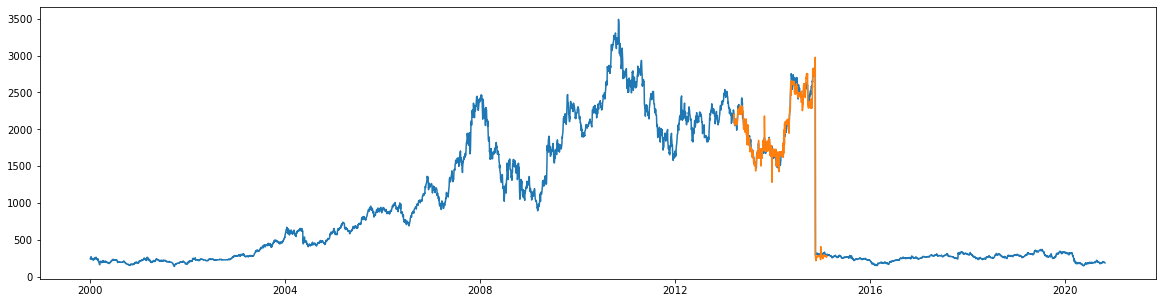

RMSE -  89.8231179148368


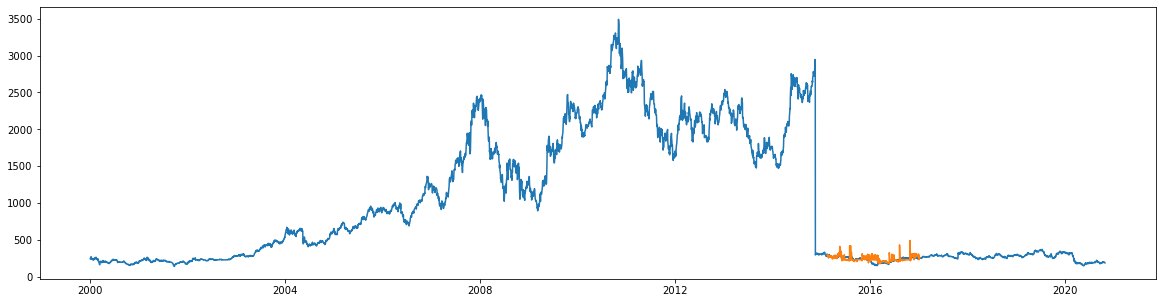

RMSE -  44.26480090910037


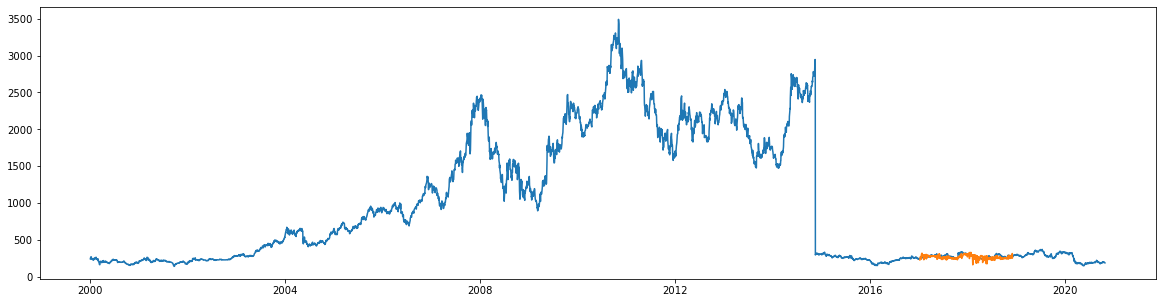

RMSE -  28.3851317059461


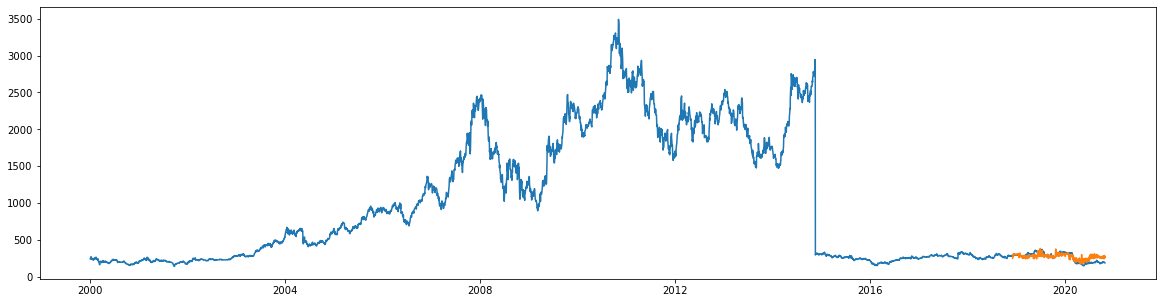

RMSE -  48.272306277450106


In [61]:
fn_y_preds = []
fn_rmses = []
knn = KNeighborsRegressor(n_neighbors=2)
for train_index,test_index in fn_ts.split(X):
    X_train,X_test = X.values[train_index],X.values[test_index]
    y_train,y_test = y.values[train_index],y.values[test_index]
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    fn_y_preds.append(y_pred)
    plt.figure(figsize=(20, 5))
    plt.plot(indx, y.values)
    plt.plot(indx[test_index], y_pred)
    plt.show()
    rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
    fn_rmses.append(rmse)
    print("RMSE - ", rmse)

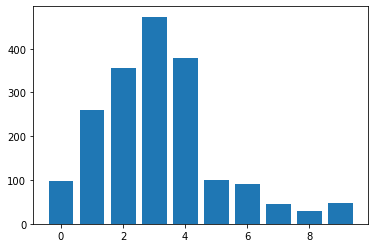

187.74004851872144


In [63]:
plt.bar(range(10), fn_rmses)
plt.show()
print(np.mean(fn_rmses))

# Linear Regression with Principal Component Analysis

In [78]:
pca = PCA(n_components=2)
X_p = pca.fit_transform(df)
X_p

array([[-3.26440469e+14,  4.38166411e+06],
       [-2.70543237e+14,  4.61926654e+06],
       [-2.96933769e+14,  4.44749866e+06],
       ...,
       [ 5.06332025e+14,  2.03887275e+07],
       [ 4.59822326e+14,  2.03179730e+07],
       [ 4.01579764e+14,  1.89790005e+07]])

In [79]:
X_p = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_p)
X_p

array([[0.00699291, 0.48241954],
       [0.01384133, 0.48401871],
       [0.01060801, 0.48286264],
       ...,
       [0.10902255, 0.59015439],
       [0.10332428, 0.58967818],
       [0.09618851, 0.58066629]])

In [83]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)
y_pred_lr

array([254.19556292, 249.65501726, 246.40541326, ..., 190.69356095,
       189.20117505, 189.81280386])

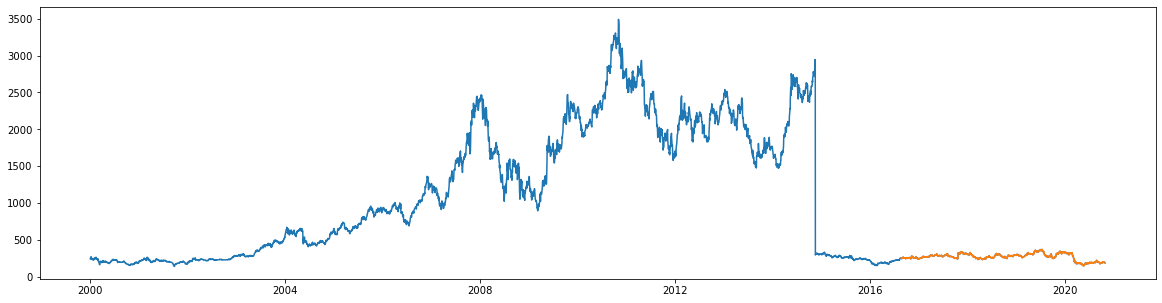

RMSE value -  0.587152913957608


In [91]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred_lr)
plt.show()
rmse_lr_fl = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred_lr)),2)))
print("RMSE value - ", rmse_lr_fl)

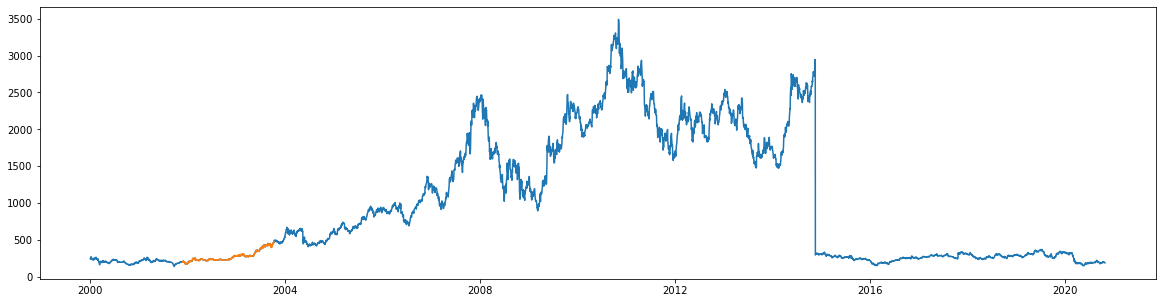

RMSE value - 1.2810958726061017


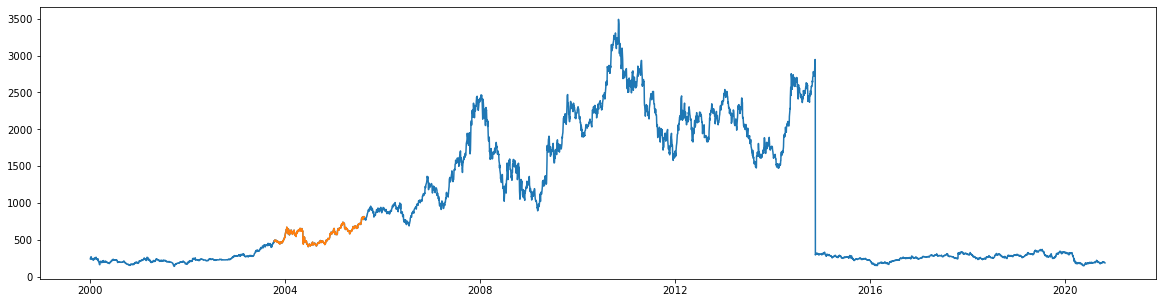

RMSE value - 2.279303076813771


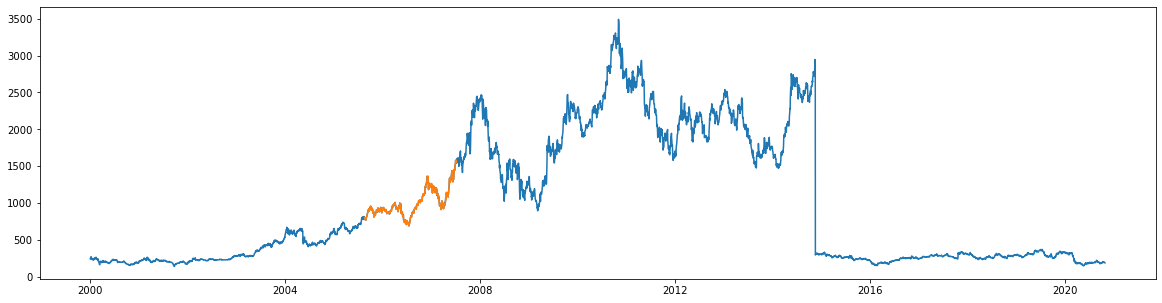

RMSE value - 3.757577086948711


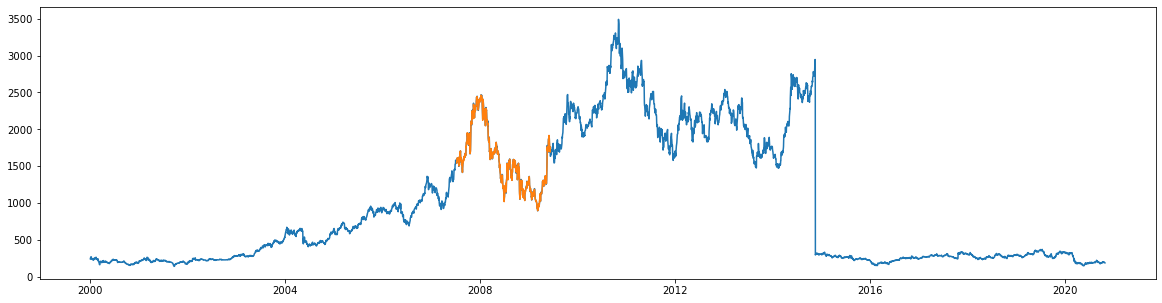

RMSE value - 7.407650363659151


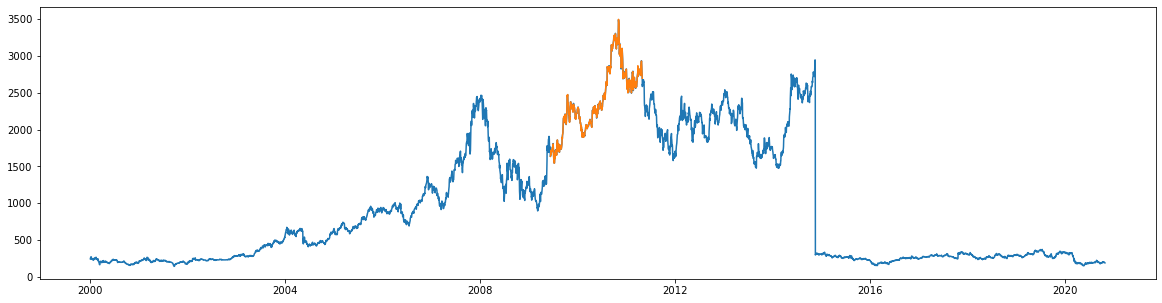

RMSE value - 5.387882885195361


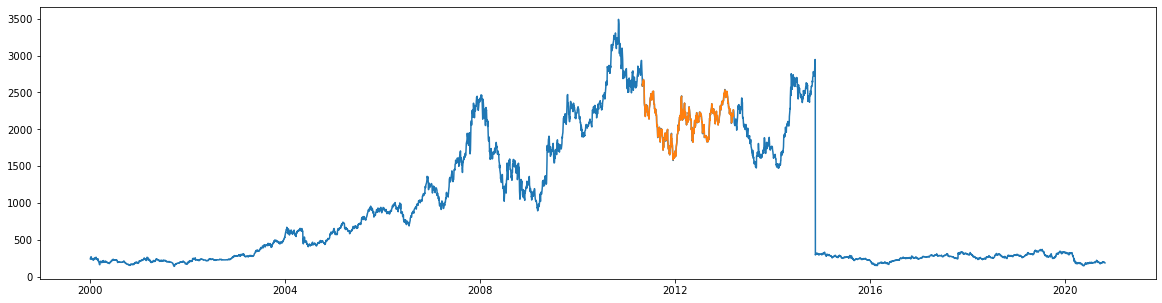

RMSE value - 4.999315582030926


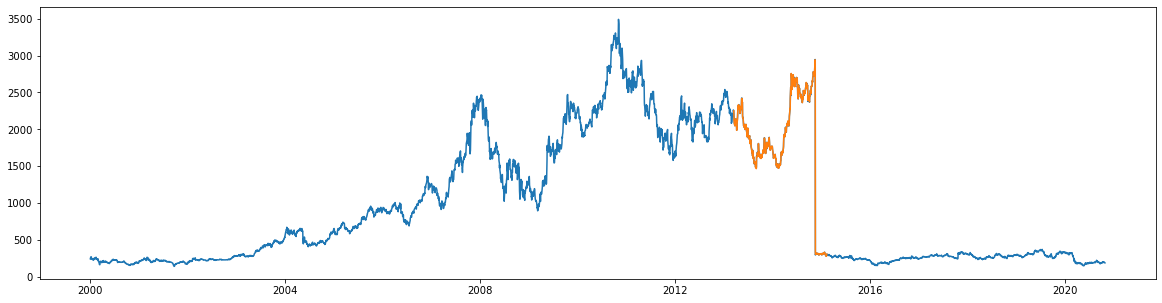

RMSE value - 4.36301716409329


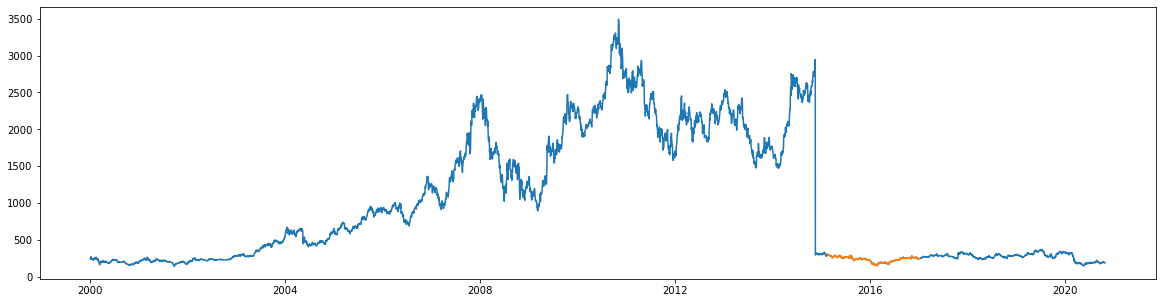

RMSE value - 0.5601614268608857


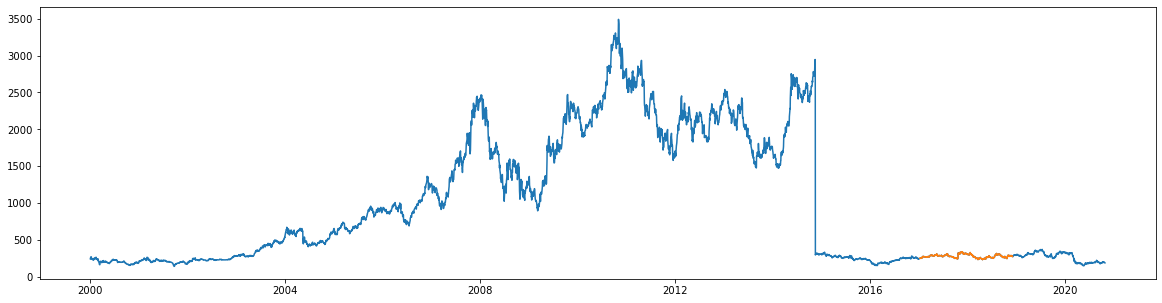

RMSE value - 0.5848077032968061


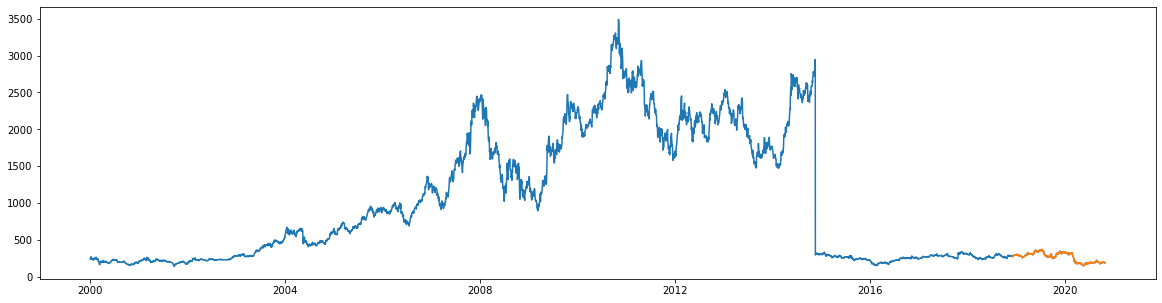

RMSE value - 0.5986734492601661


In [108]:
rmses_lr =[]
for train_index,test_index in ts.split(X):
    X_train,X_test = X.values[train_index],X.values[test_index]
    y_train,y_test = y.values[train_index],y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_pred, y_test)
    rmses_lr.append(rmse)
    plt.figure(figsize=(20, 5))
    plt.plot(y)
    plt.plot(indx[test_index], y_pred)
    plt.show()
    print("RMSE value -", rmse)

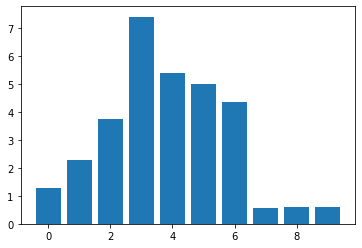

RMSE value -  3.121948461076517


In [110]:
rmse_lr_avg = np.mean(rmses_lr)
plt.bar(range(10), rmses_lr)
plt.show()
print("RMSE value - ", rmse_lr_avg)

# FbProphet for timeseries prediction

In [174]:
X_pr = pd.DataFrame(y.values, columns=['Close'])
X_pr['Date'] = y.index
X_train = X_pr[:cut]
X_test = X_pr[cut:]

In [175]:
model = Prophet()
model.fit(X_train[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

In [176]:
forecast = model.predict(X_test[["Date", "Close"]].rename(columns={"Date": "ds"}))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-24,-128.831618,-546.537074,290.527644,-128.831618,-128.831618,7.308784,7.308784,7.308784,30.995112,30.995112,30.995112,-23.686329,-23.686329,-23.686329,0.0,0.0,0.0,-121.522834
1,2016-08-25,-130.751206,-513.780164,271.944192,-130.751206,-130.751206,2.999702,2.999702,2.999702,29.095907,29.095907,29.095907,-26.096205,-26.096205,-26.096205,0.0,0.0,0.0,-127.751504
2,2016-08-26,-132.670793,-541.494550,247.174296,-132.670793,-132.670793,-1.952046,-1.952046,-1.952046,26.145131,26.145131,26.145131,-28.097177,-28.097177,-28.097177,0.0,0.0,0.0,-134.622839
3,2016-08-29,-138.429557,-538.216858,260.476790,-138.429557,-138.429557,-1.787598,-1.787598,-1.787598,29.192785,29.192785,29.192785,-30.980383,-30.980383,-30.980383,0.0,0.0,0.0,-140.217155
4,2016-08-30,-140.349144,-561.757351,249.950110,-140.349144,-140.349144,-1.327017,-1.327017,-1.327017,29.391471,29.391471,29.391471,-30.718487,-30.718487,-30.718487,0.0,0.0,0.0,-141.676161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2020-10-26,-3054.283384,-4901.769696,-669.322952,-4990.456808,-810.037872,141.600748,141.600748,141.600748,29.192785,29.192785,29.192785,112.407963,112.407963,112.407963,0.0,0.0,0.0,-2912.682636
1033,2020-10-27,-3056.202972,-4901.647579,-612.448225,-4994.023728,-809.928309,145.988041,145.988041,145.988041,29.391471,29.391471,29.391471,116.596571,116.596571,116.596571,0.0,0.0,0.0,-2910.214931
1034,2020-10-28,-3058.122560,-4926.293377,-632.148449,-4996.917411,-809.818747,151.376901,151.376901,151.376901,30.995112,30.995112,30.995112,120.381789,120.381789,120.381789,0.0,0.0,0.0,-2906.745659
1035,2020-10-29,-3060.042148,-4945.377301,-726.573055,-5000.301144,-809.709184,152.772865,152.772865,152.772865,29.095907,29.095907,29.095907,123.676958,123.676958,123.676958,0.0,0.0,0.0,-2907.269283


In [177]:
forecast.yhat

0       -121.522834
1       -127.751504
2       -134.622839
3       -140.217155
4       -141.676161
           ...     
1032   -2912.682636
1033   -2910.214931
1034   -2906.745659
1035   -2907.269283
1036   -2909.412524
Name: yhat, Length: 1037, dtype: float64

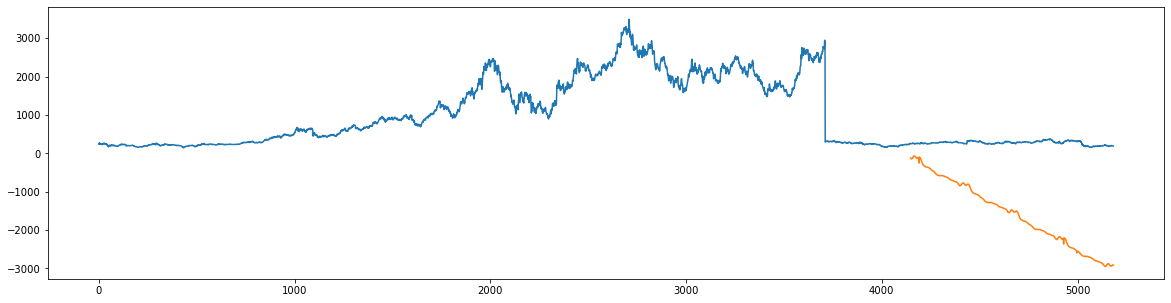

RMSE value -  2022.6677211748877


In [194]:
plt.figure(figsize=(20, 5))
plt.plot(X_pr['Close'])
plt.plot(X_test.index, forecast.yhat)
plt.show()
rmse_pr_fl = get_rmse(X_test["Close"], forecast.yhat)
print("RMSE value - ", rmse_pr_fl)

# ARIMA

In [183]:
X_train_ar = y[:cut]
X_test_ar = y[cut:]

In [184]:
arima_model = pmd.auto_arima(X_train_ar)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4147
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -22253.391
Date:                Fri, 04 Dec 2020   AIC                          44516.782
Time:                        20:59:00   BIC                          44548.432
Sample:                             0   HQIC                         44527.981
                               - 4147                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2909      0.096     13.502      0.000       1.104       1.478
ar.L2         -0.7881      0.095     -8.313      0.000      -0.974      -0.602
ma.L1         -1.2553      0.099    -12.622      0.000      -1.450      -1.060
ma.L2          0.7415      0.101      7.377      0.000       0.545       0.939
sigma2      2684.8961      4.062    660.909      0.000    2676.934    2692.858
===================================================================================
Ljung-Box (Q):                       24.95   Jarque-Bera (JB):         407315831.47
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              79.62   Skew:                           -30.53
Prob(H) (two-sided):                  0.00   Kurtosis:                      1537.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [189]:
y_pred_ar = arima_model.predict(X_test_ar.shape[0])
y_pred_ar

array([254.39662527, 254.27376593, 254.39365626, ..., 254.7096778 ,
       254.7096778 , 254.7096778 ])

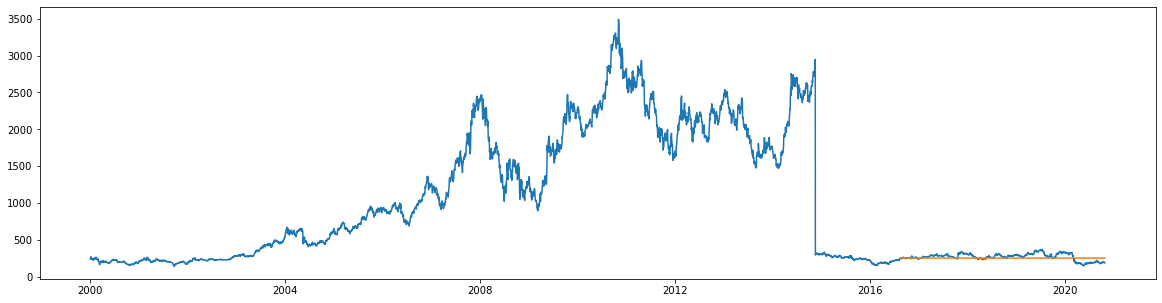

RMSE value -  48.6077325775299


In [193]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(X_test_ar.index, y_pred_ar)
plt.show()
rmse_arima_fl = get_rmse(X_test_ar, y_pred_ar)
print("RMSE value - ", rmse_arima_fl)

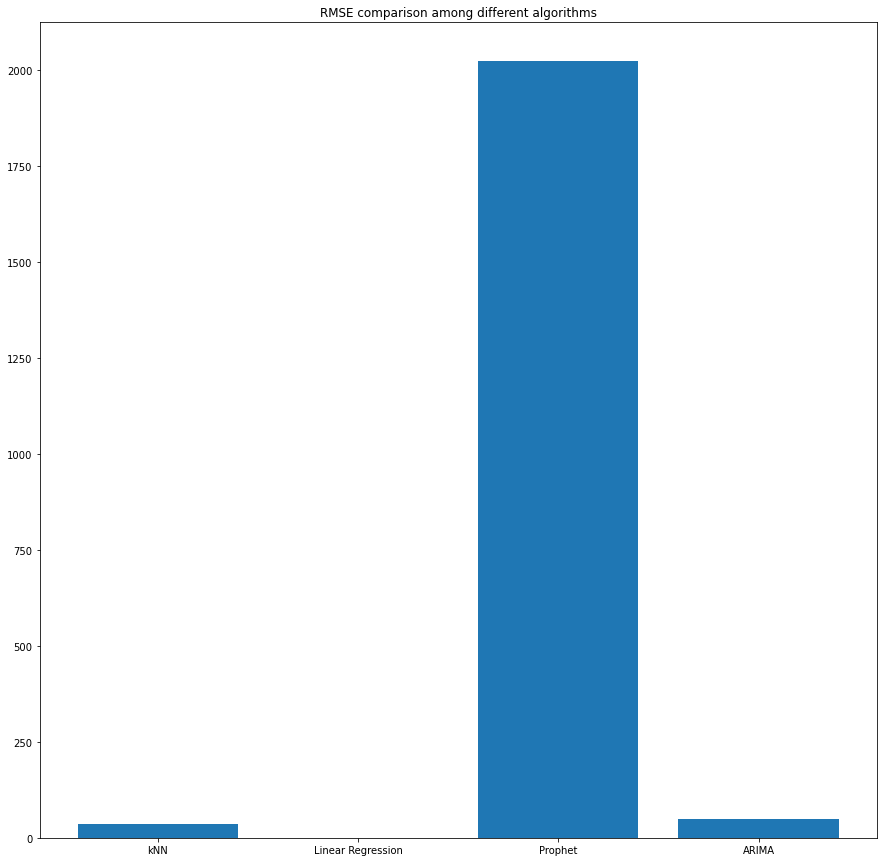

In [201]:
plt.figure(figsize=(15, 10))
plt.bar(["kNN", "Linear Regression", "Prophet", "ARIMA"], [rmse_knn_fl, rmse_lr_fl, rmse_pr_fl, rmse_arima_fl])
plt.title("RMSE comparison among different algorithms")
plt.show()